# Misinformation Diffusion Analysis
Full Research + Presentation Version (English)

## Introduction
This notebook analyzes tipping-point dynamics of misinformation diffusion on ER and BA networks using agent-based simulations.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random


In [2]:
def build_er_network(n=2000, p_edge=0.01):
    return nx.erdos_renyi_graph(n, p_edge)

def build_ba_network(n=2000, m=3):
    return nx.barabasi_albert_graph(n, m)


In [3]:
def simulate_diffusion(G, p, num_rounds=10):
    infected = set()
    newly_infected = {random.choice(list(G.nodes()))}
    infected.update(newly_infected)
    for _ in range(num_rounds):
        next_new = set()
        for node in newly_infected:
            for nbr in G.neighbors(node):
                if nbr not in infected and random.random() < p:
                    next_new.add(nbr)
        if not next_new:
            break
        infected.update(next_new)
        newly_infected = next_new
    return len(infected) / len(G.nodes())


In [4]:
def sweep_probabilities(G, p_values, runs=20):
    results=[]
    for p in p_values:
        avg = np.mean([simulate_diffusion(G, p) for _ in range(runs)])
        results.append(avg)
    return np.array(results)


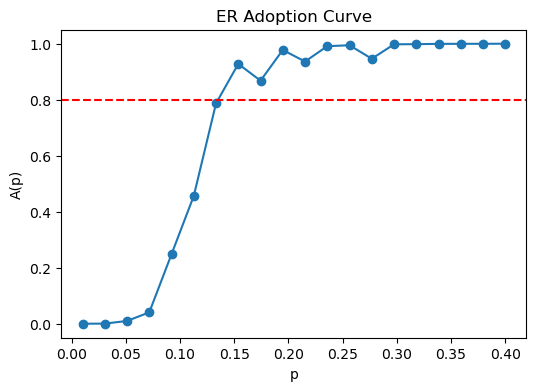

In [5]:
p_values = np.linspace(0.01,0.4,20)
G_er = build_er_network()
A_er = sweep_probabilities(G_er, p_values)

plt.figure(figsize=(6,4))
plt.plot(p_values, A_er, marker='o')
plt.axhline(0.8, color='red', linestyle='--')
plt.title("ER Adoption Curve")
plt.xlabel("p")
plt.ylabel("A(p)")
plt.show()


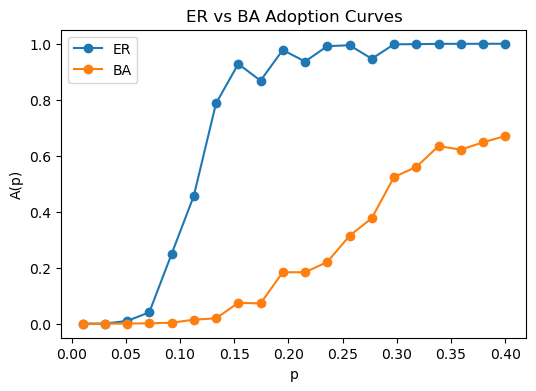

In [6]:
G_ba = build_ba_network()
A_ba = sweep_probabilities(G_ba, p_values)

plt.figure(figsize=(6,4))
plt.plot(p_values, A_er, marker='o', label='ER')
plt.plot(p_values, A_ba, marker='o', label='BA')
plt.title("ER vs BA Adoption Curves")
plt.xlabel("p")
plt.ylabel("A(p)")
plt.legend()
plt.show()


In [7]:
def logistic(p, alpha, p0):
    return 1/(1+np.exp(-alpha*(p-p0)))

params_er,_ = curve_fit(logistic, p_values, A_er, p0=[10,0.2])
params_ba,_ = curve_fit(logistic, p_values, A_ba, p0=[10,0.15])

params_er, params_ba


(array([58.40692775,  0.11390893]), array([14.08096796,  0.315767  ]))

In [8]:
import pandas as pd
import os

os.makedirs("results/csv", exist_ok=True)

df_er = pd.DataFrame({
    "p": p_values,
    "A(p)": A_er
})

df_er.to_csv("results/csv/er_adoption_curve.csv", index=False)
df_er


,p,A(p)
0,0.010000,0.000550
1,0.030526,0.000925
2,0.051053,0.010425
3,0.071579,0.041175
4,0.092105,0.248625
5,0.112632,0.456600
6,0.133158,0.786725
7,0.153684,0.927600
8,0.174211,0.867700
9,0.194737,0.977200


In [9]:
df_ba = pd.DataFrame({
    "p": p_values,
    "A(p)": A_ba
})

df_ba.to_csv("results/csv/ba_adoption_curve.csv", index=False)
df_ba


,p,A(p)
0,0.010000,0.000525
1,0.030526,0.000600
2,0.051053,0.000950
3,0.071579,0.002075
4,0.092105,0.003875
5,0.112632,0.015025
6,0.133158,0.019675
7,0.153684,0.075125
8,0.174211,0.073000
9,0.194737,0.184150
